<a href="https://colab.research.google.com/github/chanseongparkk/cs_park_portfolio/blob/main/16%EB%85%84%EB%8F%84_mlb_%ED%83%80%EC%9E%90_%EC%97%B0%EB%B4%89_%EB%AA%A8%EB%8D%B8%EB%A7%81_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터전처리

In [ ]:
#데이터 불러오기 : 연봉 데이터(2016) (목표변수)
import pandas as pd
salary = pd.read_csv('http://wolfpack.hnu.ac.kr/big_data/data/MLB1871_2018/Salaries.csv')
salary = salary[salary.yearID==2016].iloc[:,[3,4]]
#데이터 불러오기 : 타자 능력 데이터(2015)
bat = pd.read_csv('http://wolfpack.hnu.ac.kr/big_data/data/MLB1871_2018/Batting.csv')
bat = bat[bat.yearID==2015]
bat=bat.drop_duplicates(["playerID"],keep = False)
bat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1216 entries, 99863 to 101348
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  1216 non-null   object 
 1   yearID    1216 non-null   int64  
 2   stint     1216 non-null   int64  
 3   teamID    1216 non-null   object 
 4   lgID      1216 non-null   object 
 5   G         1216 non-null   int64  
 6   AB        1216 non-null   int64  
 7   R         1216 non-null   int64  
 8   H         1216 non-null   int64  
 9   2B        1216 non-null   int64  
 10  3B        1216 non-null   int64  
 11  HR        1216 non-null   int64  
 12  RBI       1216 non-null   float64
 13  SB        1216 non-null   float64
 14  CS        1216 non-null   float64
 15  BB        1216 non-null   int64  
 16  SO        1216 non-null   float64
 17  IBB       1216 non-null   float64
 18  HBP       1216 non-null   float64
 19  SH        1216 non-null   float64
 20  SF        1216 non-null 

In [ ]:
#데이터 합치기 (연봉, 능력)
df = pd.merge(salary,bat,on="playerID")
df = df.set_index("playerID")
# 타석 수 1번 이상 출전 타자 필터링(출전하지 않은 선수 제거) 
df = df[df.AB >= 1]
df.iloc[:,7:22] = df.iloc[:,7:22].div(df['AB'], axis = 0) #타격지표 타석으로 나눠줌
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555 entries, ahmedni01 to zimmery01
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   salary  555 non-null    int64  
 1   yearID  555 non-null    int64  
 2   stint   555 non-null    int64  
 3   teamID  555 non-null    object 
 4   lgID    555 non-null    object 
 5   G       555 non-null    int64  
 6   AB      555 non-null    int64  
 7   R       555 non-null    float64
 8   H       555 non-null    float64
 9   2B      555 non-null    float64
 10  3B      555 non-null    float64
 11  HR      555 non-null    float64
 12  RBI     555 non-null    float64
 13  SB      555 non-null    float64
 14  CS      555 non-null    float64
 15  BB      555 non-null    float64
 16  SO      555 non-null    float64
 17  IBB     555 non-null    float64
 18  HBP     555 non-null    float64
 19  SH      555 non-null    float64
 20  SF      555 non-null    float64
 21  GIDP    555 non-null    float6

####선수 정보 합치기

In [ ]:
#선수정보 데이터 불러오기
people = pd.read_csv('http://wolfpack.hnu.ac.kr/big_data/data/MLB1871_2018/People.csv')
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20029 entries, 0 to 20028
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   playerID   20029 non-null  object 
 1   birthYear  19915 non-null  float64
 2   weight     19212 non-null  float64
 3   height     19292 non-null  float64
 4   bats       18849 non-null  object 
 5   debut      19834 non-null  object 
dtypes: float64(3), object(3)
memory usage: 939.0+ KB


In [ ]:
people = people.iloc[:,[0,1,16,17,18,20]] #선수정보에서 필요한 정보만 저장
people.info()

In [ ]:
#원데이터와 선수 정보 데이터 합치기
df_people = pd.merge(df,people,on="playerID")
df_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 0 to 554
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   playerID   555 non-null    object 
 1   salary     555 non-null    int64  
 2   yearID     555 non-null    int64  
 3   stint      555 non-null    int64  
 4   teamID     555 non-null    object 
 5   lgID       555 non-null    object 
 6   G          555 non-null    int64  
 7   AB         555 non-null    int64  
 8   R          555 non-null    float64
 9   H          555 non-null    float64
 10  2B         555 non-null    float64
 11  3B         555 non-null    float64
 12  HR         555 non-null    float64
 13  RBI        555 non-null    float64
 14  SB         555 non-null    float64
 15  CS         555 non-null    float64
 16  BB         555 non-null    float64
 17  SO         555 non-null    float64
 18  IBB        555 non-null    float64
 19  HBP        555 non-null    float64
 20  SH        

#### 포지션 정보 합치기

In [ ]:
#포지션 데이터 불러오기
import pandas as pd
position = pd.read_csv("http://wolfpack.hnu.ac.kr/big_data/data/MLB1871_2018/Appearances.csv")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1485 entries, 99796 to 101280
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yearID     1485 non-null   int64  
 1   teamID     1485 non-null   object 
 2   lgID       1485 non-null   object 
 3   playerID   1485 non-null   object 
 4   G_all      1485 non-null   int64  
 5   GS         1485 non-null   float64
 6   G_batting  1485 non-null   int64  
 7   G_defense  1485 non-null   float64
 8   G_p        1485 non-null   int64  
 9   G_c        1485 non-null   int64  
 10  G_1b       1485 non-null   int64  
 11  G_2b       1485 non-null   int64  
 12  G_3b       1485 non-null   int64  
 13  G_ss       1485 non-null   int64  
 14  G_lf       1485 non-null   int64  
 15  G_cf       1485 non-null   int64  
 16  G_rf       1485 non-null   int64  
 17  G_of       1485 non-null   int64  
 18  G_dh       1485 non-null   float64
 19  G_ph       1485 non-null   float64
 20  G_

In [ ]:
position = position[position.yearID == 2015]
position["position"]=position.iloc[:,[8,9,10,11,12,13,14,15,16,18]].idxmax(axis=1) # 가장 많이 출전한 포지션 파생변수 생성
position = position[["position","playerID"]] #포지션 변수에서 필요한 변수 저장.
position.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1485 entries, 99796 to 101280
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   position  1485 non-null   object
 1   playerID  1485 non-null   object
dtypes: object(2)
memory usage: 34.8+ KB


In [ ]:
#원데이터와 포지션 데이터에서 필요한 데이터를 합쳐 최종 데이터를 생성한다.
df_final = pd.merge(df_people,position,on="playerID")
#투수가 타석에 들어온 경우는 제외
df_final = df_final[df_final.position!="G_p"]
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 554
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   playerID   366 non-null    object 
 1   salary     366 non-null    int64  
 2   yearID     366 non-null    int64  
 3   stint      366 non-null    int64  
 4   teamID     366 non-null    object 
 5   lgID       366 non-null    object 
 6   G          366 non-null    int64  
 7   AB         366 non-null    int64  
 8   R          366 non-null    float64
 9   H          366 non-null    float64
 10  2B         366 non-null    float64
 11  3B         366 non-null    float64
 12  HR         366 non-null    float64
 13  RBI        366 non-null    float64
 14  SB         366 non-null    float64
 15  CS         366 non-null    float64
 16  BB         366 non-null    float64
 17  SO         366 non-null    float64
 18  IBB        366 non-null    float64
 19  HBP        366 non-null    float64
 20  SH        

In [ ]:
# 팀의 숫자가 너무 많다. 동부 중부 서부로 나누어 범주화시키겠다.
a1 = ["LAA", "OAK", "SEA", "TEX","HOU", "SFN", "COL","SDN","ARI","LAN"]
a2 = ["NYN", "ATL", "WAS", "PHI", "MIA","CHA","MIN","CLE","KCA","DET"]
a3 = ["NYA", "BOS", "TBA", "TOR", "BAL", "CHN", "SLN", "PIT", "CIN", "MIL"]
df_final['teamID'] = df_final['teamID'].replace(a1, 'western')
df_final['teamID'] = df_final['teamID'].replace(a2, 'central')
df_final['teamID'] = df_final['teamID'].replace(a3, 'eastern')

In [ ]:
df_final["age"]= 2015 - df_final["birthYear"] #나이 파생변수 생성해준다.
df_final["debut_yr"]=2015-df_final["debut"].str.split("-",n=1,expand=True)[0].astype(int) # 연차 파생변수 생성해준다.
df_final = df_final.iloc[:,[0,1,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,28,29,30]] #필요한 변수만 가져간다.
df_final.info() #최종 데이터셋

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 554
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  366 non-null    object 
 1   salary    366 non-null    int64  
 2   teamID    366 non-null    object 
 3   lgID      366 non-null    object 
 4   G         366 non-null    int64  
 5   R         366 non-null    float64
 6   H         366 non-null    float64
 7   2B        366 non-null    float64
 8   3B        366 non-null    float64
 9   HR        366 non-null    float64
 10  RBI       366 non-null    float64
 11  SB        366 non-null    float64
 12  CS        366 non-null    float64
 13  BB        366 non-null    float64
 14  SO        366 non-null    float64
 15  IBB       366 non-null    float64
 16  HBP       366 non-null    float64
 17  SH        366 non-null    float64
 18  SF        366 non-null    float64
 19  GIDP      366 non-null    float64
 20  weight    366 non-null    float6

## 분석 과정

### 최종 데이터셋

In [ ]:
# df_final.to_csv("bat.csv",index=False, encoding='cp949') # 최종 데이터 csv파일 생성

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
mlb = pd.read_csv("/content/drive/MyDrive/다변량21_박찬성/데이터/bat.csv")
mlb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  366 non-null    object 
 1   salary    366 non-null    int64  
 2   teamID    366 non-null    object 
 3   lgID      366 non-null    object 
 4   G         366 non-null    int64  
 5   R         366 non-null    float64
 6   H         366 non-null    float64
 7   2B        366 non-null    float64
 8   3B        366 non-null    float64
 9   HR        366 non-null    float64
 10  RBI       366 non-null    float64
 11  SB        366 non-null    float64
 12  CS        366 non-null    float64
 13  BB        366 non-null    float64
 14  SO        366 non-null    float64
 15  IBB       366 non-null    float64
 16  HBP       366 non-null    float64
 17  SH        366 non-null    float64
 18  SF        366 non-null    float64
 19  GIDP      366 non-null    float64
 20  weight    366 non-null    float6

In [3]:
mlb = mlb.set_index(["playerID"]) #선수이름을 인덱스로 바꾼다.
mlb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, ahmedni01 to zimmery01
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    366 non-null    int64  
 1   teamID    366 non-null    object 
 2   lgID      366 non-null    object 
 3   G         366 non-null    int64  
 4   R         366 non-null    float64
 5   H         366 non-null    float64
 6   2B        366 non-null    float64
 7   3B        366 non-null    float64
 8   HR        366 non-null    float64
 9   RBI       366 non-null    float64
 10  SB        366 non-null    float64
 11  CS        366 non-null    float64
 12  BB        366 non-null    float64
 13  SO        366 non-null    float64
 14  IBB       366 non-null    float64
 15  HBP       366 non-null    float64
 16  SH        366 non-null    float64
 17  SF        366 non-null    float64
 18  GIDP      366 non-null    float64
 19  weight    366 non-null    float64
 20  height    366 non-null 

### 리그, 포지션, 지구, 주손잡이 별 연봉 분산분석

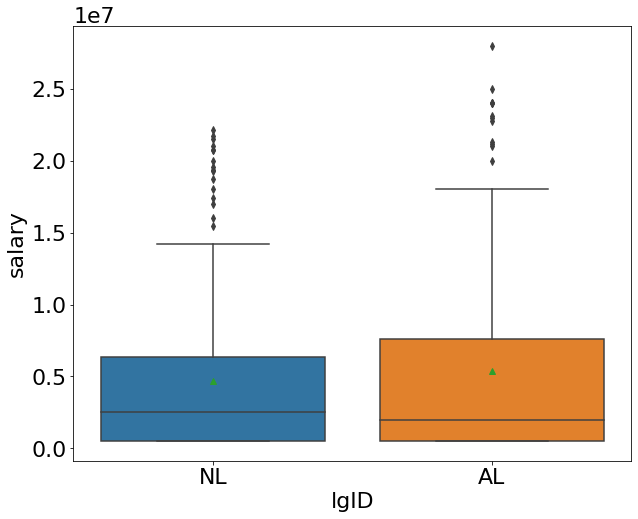

In [10]:
#리그 별 연봉 박스플롯 시각화

import seaborn as sns
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 22})
sns.boxplot(x="lgID", y="salary", data=mlb, showmeans=True)

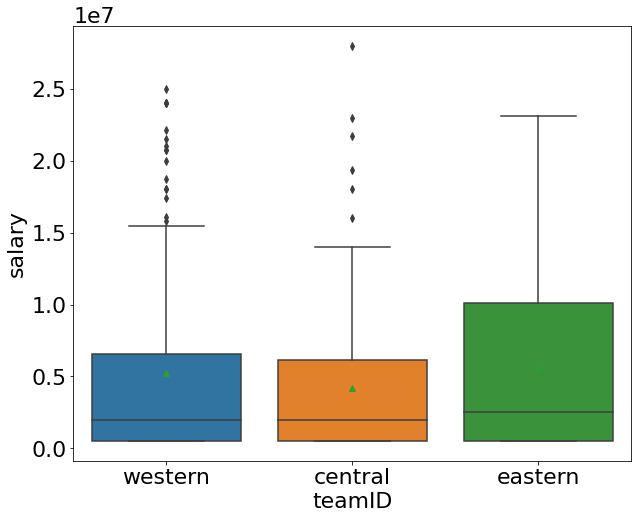

In [12]:
#지구 별 연봉 박스플롯 시각화

figure = plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 22})
sns.boxplot(x="teamID", y="salary", data=mlb, showmeans=True)

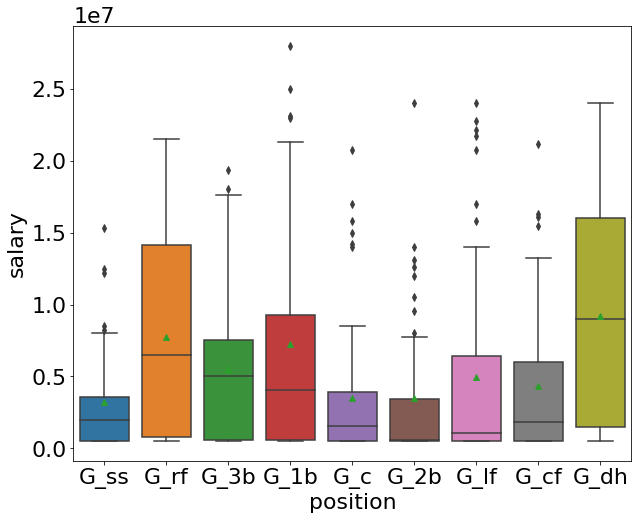

In [13]:
#포지션 별 연봉 박스플롯 시각화

figure = plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 22})
sns.boxplot(x="position", y="salary", data=mlb, showmeans=True)

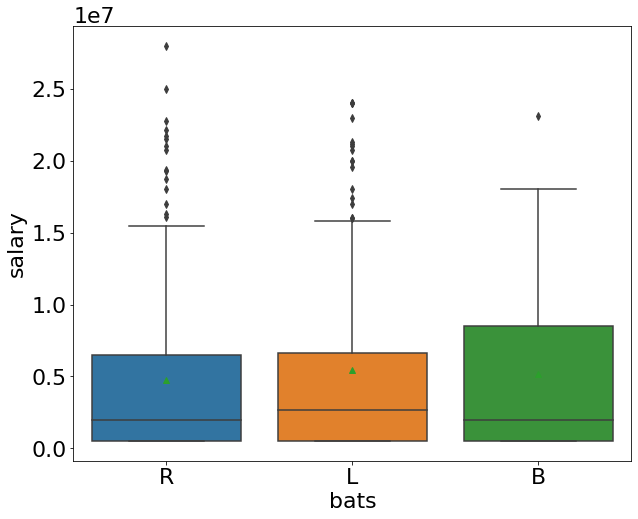

In [14]:
#주손잡이 별 연봉 박스플롯 시각화

figure = plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 22})
sns.boxplot(x="bats", y="salary", data=mlb, showmeans=True)

In [ ]:
#리그 별 연봉 다중비교
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(mlb['salary'],mlb['lgID'])
mc_results = mc.tukeyhsd()
print(mc_results)
# 유의수준 5% 수준에서 리그 간 연봉의 평균에 유의한 차이가 존재하지 않는다.

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
    AL     NL -651010.7462 0.3214 -1940255.868 638234.3756  False
-----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [ ]:
#지구 별 연봉 다중비교
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(mlb['salary'],mlb['teamID'])
mc_results = mc.tukeyhsd()
print(mc_results)
# 유의수준 5% 수준에서 지구 간 연봉의 평균에 유의한 차이가 존재하지 않는다.

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
 group1  group2   meandiff   p-adj     lower        upper     reject
--------------------------------------------------------------------
central eastern 1456921.5477 0.1691 -441044.9458 3354888.0412  False
central western 1052843.2575  0.393 -841433.9727 2947120.4878  False
eastern western -404078.2902 0.8526 -2270533.695 1462377.1147  False
--------------------------------------------------------------------


In [ ]:
#포지션 별 연봉 다중비교
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(mlb['salary'],mlb['position'])
mc_results = mc.tukeyhsd()
print(mc_results)
# 유의수준 5% 수준에서 (2루수, 좌익수), (포수, 좌익수), (좌익수, 유격수) 총 세 조합에서 포지션에 따른 연봉 평균에 유의한 차이가 있다.

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
group1 group2    meandiff   p-adj      lower          upper     reject
----------------------------------------------------------------------
  G_1b   G_2b -3755053.7027 0.0998  -7839823.5671   329716.1618  False
  G_1b   G_3b  -1747010.602    0.9  -6078142.3699  2584121.1659  False
  G_1b    G_c -3762668.7991  0.069  -7665285.8454   139948.2471  False
  G_1b   G_cf  -2861823.075 0.4917  -7163248.5131  1439602.3631  False
  G_1b   G_dh  2004662.1173    0.9  -4057438.7003  8066762.9349  False
  G_1b   G_lf -2299293.2046 0.6515  -6260467.4162  1661881.0069  False
  G_1b   G_rf   545783.6045    0.9  -3727268.0053  4818835.2142  False
  G_1b   G_ss  -4033628.625 0.0779   -8279549.474    212292.224  False
  G_2b   G_3b  2008043.1006 0.8382  -2165229.4019  6181315.6032  False
  G_2b    G_c    -7615.0965    0.9  -3734265.1738  3719034.9809  False
  G_2b   G_cf   893230.6277    0.9  -3249203.6554  5035664.9107  False
  G_2b

In [ ]:
#주손잡이 별 연봉 다중비교
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(mlb['salary'],mlb['bats'])
mc_results = mc.tukeyhsd()
print(mc_results)
# 유의수준 5% 수준에서 주손잡이 간 연봉의 평균에 유의한 차이가 존재하지 않는다.

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj      lower        upper     reject
-------------------------------------------------------------------
     B      L  302438.4874    0.9 -2262582.7654 2867459.7402  False
     B      R -439851.2388 0.8989 -2854605.4069 1974902.9292  False
     L      R -742289.7262 0.5593 -2451143.3828  966563.9304  False
-------------------------------------------------------------------


### 연봉 예측모형(회귀분석)

In [ ]:
#범주형변수 더미화
mlb_1 = pd.get_dummies(mlb,drop_first=True)
mlb_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, ahmedni01 to zimmery01
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   salary          366 non-null    int64  
 1   G               366 non-null    int64  
 2   R               366 non-null    float64
 3   H               366 non-null    float64
 4   2B              366 non-null    float64
 5   3B              366 non-null    float64
 6   HR              366 non-null    float64
 7   RBI             366 non-null    float64
 8   SB              366 non-null    float64
 9   CS              366 non-null    float64
 10  BB              366 non-null    float64
 11  SO              366 non-null    float64
 12  IBB             366 non-null    float64
 13  HBP             366 non-null    float64
 14  SH              366 non-null    float64
 15  SF              366 non-null    float64
 16  GIDP            366 non-null    float64
 17  weight          366 non-nu

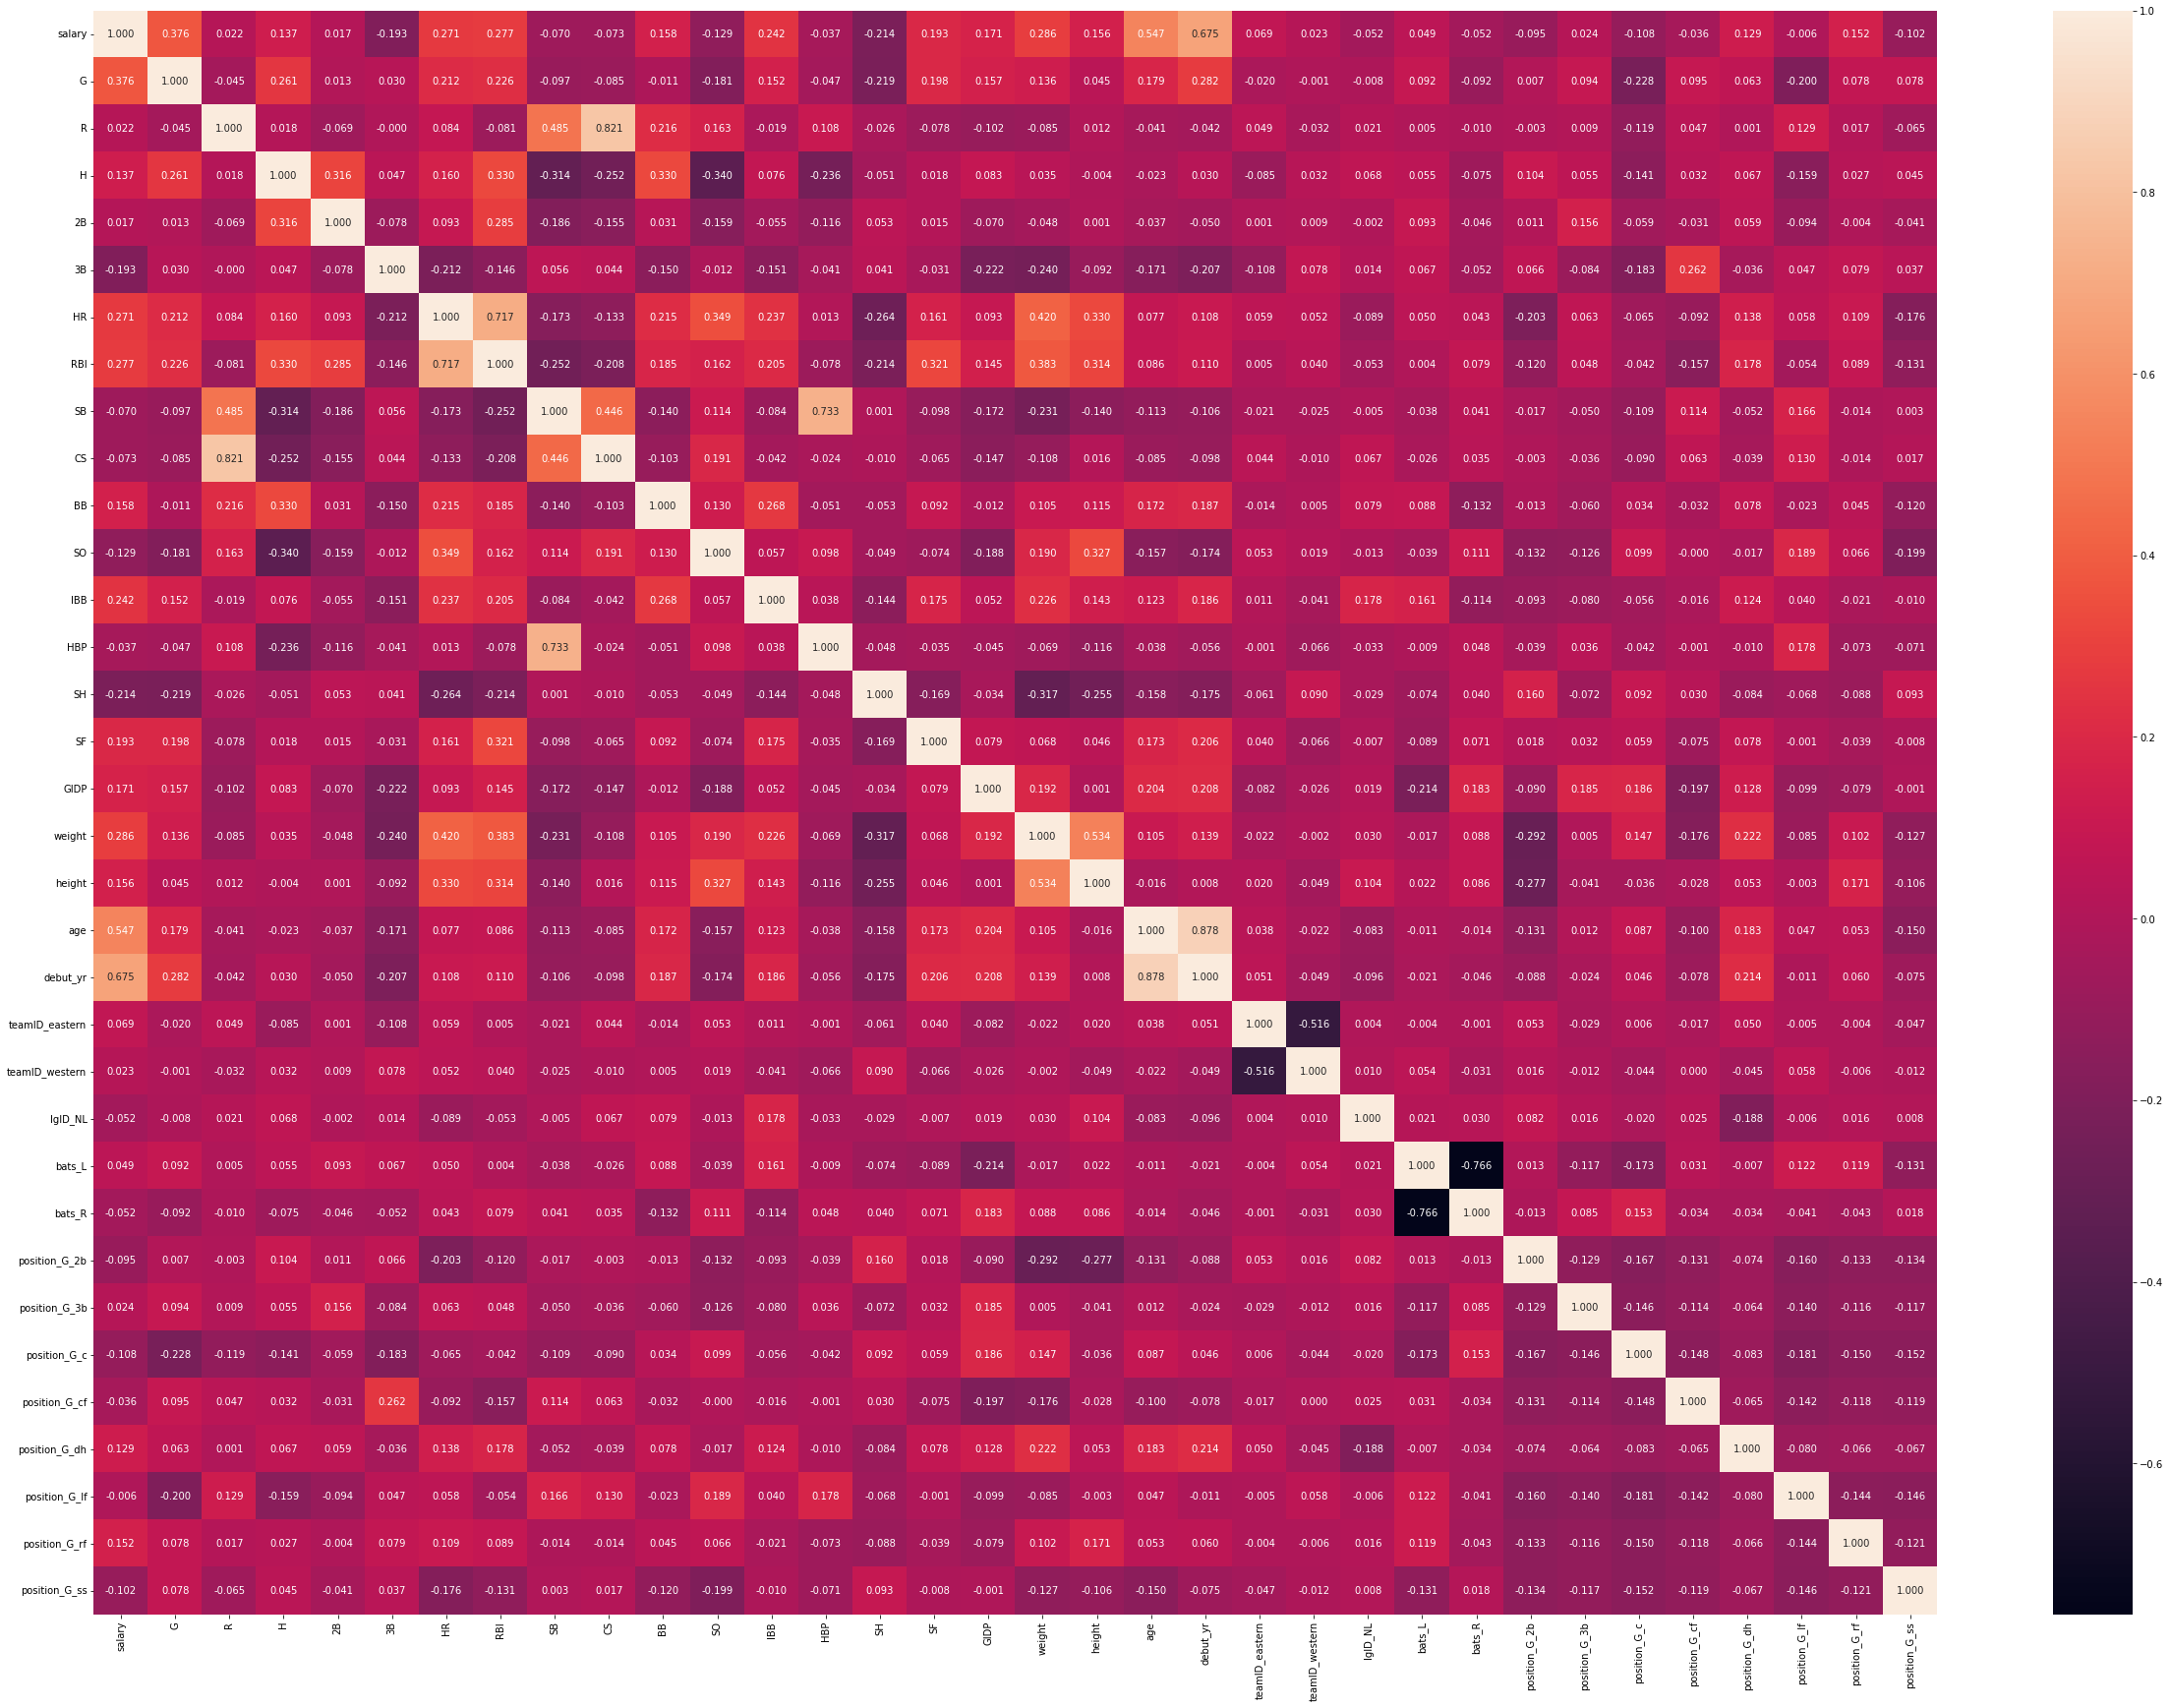

In [ ]:
#설명변수 간 상관계수 맵
mlb_cor=mlb_1.corr(method='pearson')
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(mlb_cor,annot=True,fmt=".3f")
plt.rcParams['figure.figsize']=[42,30]
plt.show()
# 높은 상관계수를 가진 설명변수 사이에는 다중공선성 문제를 가지고 있을 위험이 크다.

In [ ]:
#Univariate Selection  변수선택
y=mlb_1["salary"]
X=mlb_1.drop(["salary"],axis=1)
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
bestfeatures = SelectKBest(score_func=f_regression,k=X.shape[1]) #default k=10
fit=bestfeatures.fit(X,y)
dfpvalues = pd.DataFrame(fit.pvalues_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores,dfpvalues],axis=1)
featureScores.columns = ['var_name','Score','pvalues'] #naming the dataframe columns
featureScores=featureScores[featureScores['pvalues']<0.01]
selected_features_US=featureScores['var_name'].tolist()
selected_features_US 

['G',
 'H',
 '3B',
 'HR',
 'RBI',
 'BB',
 'IBB',
 'SH',
 'SF',
 'GIDP',
 'weight',
 'height',
 'age',
 'debut_yr',
 'position_G_rf']

In [ ]:
#다중공선성 진단
#VIF지수가 5 이하인 변수만 가져온다.
X=mlb_1[selected_features_US]
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif_(X, thresh=5):
  variables = list(range(X.shape[1]))
  dropped = True
  while dropped:
    dropped = False
    vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
      for ix in range(X.iloc[:, variables].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
      print('dropping \'' + X.iloc[:, variables].columns[maxloc] + '\' at index: ' + str(maxloc))
      del variables[maxloc]
      dropped = True
  print('Remaining variables:')
  print(X.columns[variables])
  return X.iloc[:, variables]

X_remain_vif=calculate_vif_(X)

dropping 'height' at index: 11
dropping 'age' at index: 11
dropping 'H' at index: 1
dropping 'weight' at index: 9
dropping 'RBI' at index: 3
dropping 'G' at index: 0
Remaining variables:
Index(['3B', 'HR', 'BB', 'IBB', 'SH', 'SF', 'GIDP', 'debut_yr',
       'position_G_rf'],
      dtype='object')


In [ ]:
#최종 모형추정
X = mlb_1[[ 'HR', 'IBB', 'debut_yr','position_G_rf']] # 예측변수
y = mlb_1["salary"] # 목표변수
import statsmodels.api as sm
fit=sm.OLS(y, sm.add_constant(X)).fit()
print(fit.summary())
# 다중공선성 문제를 해결하고 유의수준 5%이내에서 유의하지 않은 변수를 제거한 최종모형이다.
# 설명률은 약 51%로 실제로 사용할만한 수준의 설명률은 아님을 알 수 있었다.
# 홈런을 많이 치고 고의사구를 많이 얻어내고 데뷔년도가 오래됐을수록 연봉을 많이 받으며 좌익수의 경우 연봉을 많이 받는 것을 알 수 있다.
# salary = -1951000 + 55070000*HR + 64230000*IBB + 1021000*debut_yr + 1.959000*position_rf

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     94.28
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           7.96e-55
Time:                        10:12:08   Log-Likelihood:                -6116.3
No. Observations:                 366   AIC:                         1.224e+04
Df Residuals:                     361   BIC:                         1.226e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.951e+06   4.87e+05     -4.009

### 연봉 판별분석
- 연봉을 [상-25%, 하=75%]로 나누고 고액연봉여부에 대한 판별분석을 진행해본다.

In [ ]:
mlb_2 = mlb_1
mlb_l = mlb_1

In [ ]:
# 고액연봉여부 파생변수를 생성한다.(로지스틱회귀분석용)
import numpy as np
conditions = [
  mlb_1['salary']>=mlb_1['salary'].quantile(0.75) ,
    mlb_1['salary']<mlb_1['salary'].quantile(0.75)
    ]
values = [1,0]
mlb_l['salary_group'] = np.select(conditions, values)
mlb_l['salary_group'].value_counts()

0    274
1     92
Name: salary_group, dtype: int64

In [ ]:
# 고액연봉여부 파생변수를 생성한다.
import numpy as np
conditions = [
  mlb_1['salary']>=mlb_1['salary'].quantile(0.75) ,
    mlb_1['salary']<mlb_1['salary'].quantile(0.75)
    ]
values = ["high","low"]
mlb_2['salary_group'] = np.select(conditions, values)
mlb_2['salary_group'].value_counts()

low     274
high     92
Name: salary_group, dtype: int64

#### 로지스틱회귀분석

In [ ]:
y= mlb_l["salary_group"]
X=mlb_l.drop(["salary_group","salary"],axis=1)#연봉 변수는 제거해준다.

In [ ]:
#train test data 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=620)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((256, 33), (110, 33), (256,), (110,))

In [ ]:
mlb_l.salary_group

playerID
ahmedni01    0
britoso01    0
drurybr01    0
goldspa01    0
herrmch01    0
            ..
rendoan01    0
robincl01    0
taylomi02    0
werthja01    1
zimmery01    1
Name: salary_group, Length: 366, dtype: int64

In [ ]:
### parameter 들을 dictionary 형태로 설정

log = LogisticRegression()

parameters = {'penalty':['l2', 'l1'],
         'C':[0.01, 0.05, 0.1, 0.5, 1, 5, 10]}


In [ ]:
# 최적의 파라미터 서칭

from numpy.core.function_base import logspace
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=log, 
                           param_grid=parameters, 
                           n_jobs=-1, 
                          )

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

{'C': 0.05, 'penalty': 'l2'}

In [ ]:
log = LogisticRegression(C=0.05, penalty="l2")
log.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=0.05)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y,log.predict(X))
print('AUC for LDA: %.2f' % auc) # auc score 79%

AUC for LDA: 0.79


In [ ]:
# confusion matrix & 모형 정확도
from sklearn.metrics import confusion_matrix, classification_report, precision_score
y_pred=1*(log.predict(X_train)> 0.5)
print(confusion_matrix(y_pred,y_train)) #정분류표 confusion table(matrix)
print(classification_report(y_train,y_pred)) 

[[184  23]
 [ 11  38]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       195
           1       0.78      0.62      0.69        61

    accuracy                           0.87       256
   macro avg       0.83      0.78      0.80       256
weighted avg       0.86      0.87      0.86       256



In [ ]:
# confusion matrix & 모형 정확도
from sklearn.metrics import confusion_matrix, classification_report, precision_score
y_pred=1*(log.predict(X_test)> 0.5)
print(confusion_matrix(y_pred,y_test)) #정분류표 confusion table(matrix)
print(classification_report(y_test,y_pred)) # 테스트 데이터에 대해서 약 79% 정확도, 79% 재현율

[[69  9]
 [10 22]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88        79
           1       0.69      0.71      0.70        31

    accuracy                           0.83       110
   macro avg       0.79      0.79      0.79       110
weighted avg       0.83      0.83      0.83       110



In [ ]:
log.score(X_test,y_test) # 약 82.7% 모델 정확도

0.8272727272727273

In [ ]:
#로지스틱회귀모델 분류확률
log_prob = pd.DataFrame(log.predict_proba(X_test))
log_prob.index = X_test.index
log_prob.columns = [0, 1]
log_prob["classification"] = log_prob.idxmax(axis=1)
log_prob = pd.merge(y_test,log_prob,left_index=True, right_index=True, how='inner')
log_prob

,salary_group,0,1,classification
playerID,,,,
jonesad01,1,0.3,0.7,1
gomesya01,0,1.0,0.0,0
suareeu01,0,1.0,0.0,0
spangco01,0,1.0,0.0,0
kangju01,0,1.0,0.0,0
...,...,...,...,...
gregodi01,0,0.8,0.2,0
bethach01,0,1.0,0.0,0
beltrca01,1,0.0,1.0,1


#### 의사결정나무

In [ ]:
y= mlb_2["salary_group"]
X=mlb_2.drop(["salary_group","salary"],axis=1)

In [ ]:
#train test data 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=620)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((256, 33), (110, 33), (256,), (110,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[3,4,5,6,7,8,9,10,11,12,13,14,15],
              'min_samples_split':[10,15,20,25,30], 
              'min_samples_leaf':[5,8,11,14,17,20]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, 
                           param_grid=parameters, 
                           n_jobs=-1, 
                          )

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 10}

In [ ]:
#최적의 파라미터로 모델링
dt = DecisionTreeClassifier(max_depth=3, 
                            min_samples_split = 10,
                            min_samples_leaf= 5)
dt.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10)

In [ ]:
#confusion matrix & 모형 정확도
from sklearn.metrics import confusion_matrix,classification_report, precision_score
print(confusion_matrix(dt.predict(X_train),y_train)) #정분류 표 confusion_table(matrix)
print(classification_report(y_train,dt.predict(X_train)))

[[187  19]
 [  8  42]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       195
           1       0.84      0.69      0.76        61

    accuracy                           0.89       256
   macro avg       0.87      0.82      0.84       256
weighted avg       0.89      0.89      0.89       256



In [ ]:
dt.score(X_train,y_train)

0.89453125

In [ ]:
#confusion matrix & 모형 정확도
from sklearn.metrics import confusion_matrix,classification_report, precision_score
print(confusion_matrix(dt.predict(X_test),y_test)) #정분류 표 confusion_table(matrix)
print(classification_report(y_test,dt.predict(X_test))) # 84% 정밀도, 84% 재현율

[[72  7]
 [ 7 24]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        79
           1       0.77      0.77      0.77        31

    accuracy                           0.87       110
   macro avg       0.84      0.84      0.84       110
weighted avg       0.87      0.87      0.87       110



In [ ]:
dt.score(X_test,y_test) # 약 87.3% 모델정확도

0.8727272727272727

In [ ]:
# 의사결정나무 모델 분류확률
dt_prob = pd.DataFrame(dt.predict_proba(X_test))
dt_prob.index = X_test.index
dt_prob.columns = ["low", "high"]
dt_prob["classification"] = dt_prob.idxmax(axis=1)
dt_prob = pd.merge(y_test,dt_prob,left_index=True, right_index=True, how='inner')
dt_prob

,salary_group,low,high,classification
playerID,,,,
jonesad01,1,0.1,0.9,high
gomesya01,0,1.0,0.0,low
suareeu01,0,1.0,0.0,low
spangco01,0,1.0,0.0,low
kangju01,0,1.0,0.0,low
...,...,...,...,...
gregodi01,0,0.7,0.3,low
bethach01,0,1.0,0.0,low
beltrca01,1,0.1,0.9,high


In [ ]:
#트리 분기 과정
from sklearn import tree
clf=DecisionTreeClassifier(max_depth=3,min_samples_split=10,min_samples_leaf=5)
clf=clf.fit(X_train, y_train)
#tree.plot_tree(clf)

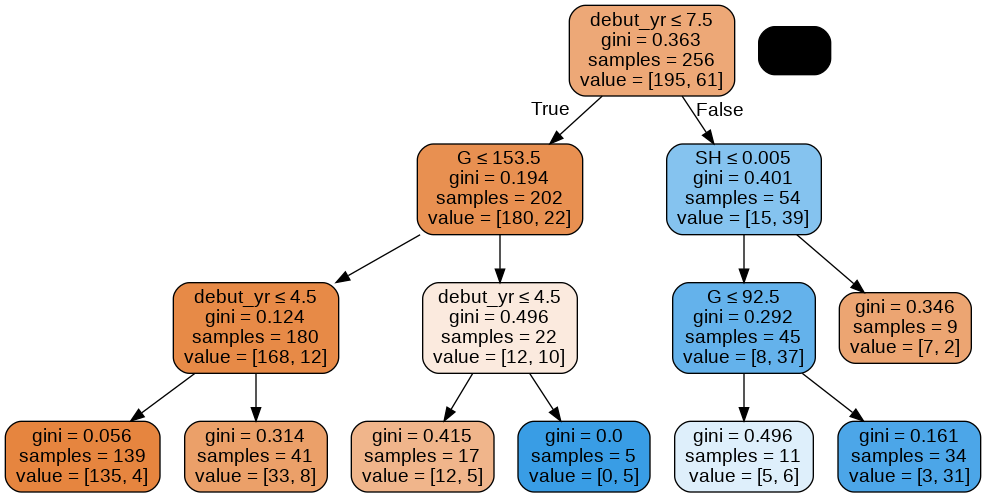

In [ ]:
#의사결정나무 그리기
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,
 special_characters=True,feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

#### k-nearest-neighbor 판별분석(최근접이웃법)

In [ ]:
y= mlb_2["salary_group"]
X=mlb_2.drop(["salary_group","salary"],axis=1)

In [ ]:
#train test data 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=620)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((256, 33), (110, 33), (256,), (110,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]} #n의 수를 짝수로 하면 동률일 경우 판별하기가 어렵다.

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=knn, 
                           param_grid=parameters, 
                           n_jobs=-1, 
                          )

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'n_neighbors': 15}

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
#confusion matrix & 모형 정확도
from sklearn.metrics import confusion_matrix,classification_report, precision_score
print(confusion_matrix(knn.predict(X_train),y_train)) #정분류 표 confusion_table(matrix)
print(classification_report(y_train,knn.predict(X_train)))

[[192  39]
 [  3  22]]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       195
           1       0.88      0.36      0.51        61

    accuracy                           0.84       256
   macro avg       0.86      0.67      0.71       256
weighted avg       0.84      0.84      0.81       256



In [ ]:
knn.score(X_train, y_train)

0.8359375

In [ ]:
#confusion matrix & 모형 정확도
from sklearn.metrics import confusion_matrix,classification_report, precision_score
print(confusion_matrix(knn.predict(X_test),y_test)) #정분류 표 confusion_table(matrix)
print(classification_report(y_test,knn.predict(X_test))) #84% 정밀도, 70% 재현률

[[77 18]
 [ 2 13]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.89        79
           1       0.87      0.42      0.57        31

    accuracy                           0.82       110
   macro avg       0.84      0.70      0.73       110
weighted avg       0.83      0.82      0.79       110



In [ ]:
#knn모델 분류 확률
knn_prob = pd.DataFrame(knn.predict_proba(X_test))
knn_prob.index = X_test.index
knn_prob.columns = ["low","high"]
knn_prob["classification"] = knn_prob.idxmax(axis=1)
knn_prob = pd.merge(y_test,knn_prob,left_index=True, right_index=True, how='inner')
knn_prob

,salary_group,low,high,classification
playerID,,,,
jonesad01,1,0.7,0.3,low
gomesya01,0,0.9,0.1,low
suareeu01,0,0.9,0.1,low
spangco01,0,0.9,0.1,low
kangju01,0,0.9,0.1,low
...,...,...,...,...
gregodi01,0,0.8,0.2,low
bethach01,0,0.9,0.1,low
beltrca01,1,0.6,0.4,low


In [ ]:
knn.score(X_test, y_test) # 모델 정확도 81.8%

0.8181818181818182

#### svm

In [ ]:
y= mlb_2["salary_group"]
X=mlb_2.drop(["salary_group","salary"],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandarScaler 적용

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                      test_size = 0.3, random_state = 620)

In [ ]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

svm_clf = svm.SVC(kernel = 'rbf',random_state=620)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100],
             'gamma':[0.001, 0.01, 0.1, 1, 10, 25, 50, 100]
}

grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 5)

grid_svm.fit(X_train, y_train)
grid_svm.best_params_

{'C': 50, 'gamma': 0.001}

In [ ]:
svm = svm.SVC(kernel = 'rbf',random_state=620, C=50, gamma=0.001)

In [ ]:
svm.fit(X_train, y_train)

SVC(C=50, gamma=0.001, random_state=620)

In [ ]:
#confusion matrix & 모형 정확도
from sklearn.metrics import confusion_matrix,classification_report, precision_score
print(confusion_matrix(svm.predict(X_train),y_train)) #정분류 표 confusion_table(matrix)
print(classification_report(y_train,svm.predict(X_train)))

[[189  17]
 [  6  44]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       195
           1       0.88      0.72      0.79        61

    accuracy                           0.91       256
   macro avg       0.90      0.85      0.87       256
weighted avg       0.91      0.91      0.91       256



In [ ]:
svm.score(X_train,y_train)

0.91015625

In [ ]:
#confusion matrix & 모형 정확도
from sklearn.metrics import confusion_matrix,classification_report, precision_score
print(confusion_matrix(svm.predict(X_test),y_test)) #정분류 표 confusion_table(matrix)
print(classification_report(y_test,svm.predict(X_test))) #79% 정밀도, 78% 재현률

[[70 10]
 [ 9 21]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        79
           1       0.70      0.68      0.69        31

    accuracy                           0.83       110
   macro avg       0.79      0.78      0.78       110
weighted avg       0.83      0.83      0.83       110



In [ ]:
svm.score(X_test,y_test) #약 82.7% 모델 정확도

0.8272727272727273